In [1]:
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, TimeDistributed
from tensorflow.keras import Input
from tensorflow.keras.models import Model
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)

In [3]:
def define_model():
    inputs = Input(shape=(None, 1))
    x = Bidirectional(LSTM(32, return_sequences=True))(inputs)
    outputs = TimeDistributed(Dense(1, activation="sigmoid"))(x)
    model = Model(inputs, outputs)
    return model

In [81]:
model = define_model()

In [82]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, None, 1)]         0         
                                                                 
 bidirectional_2 (Bidirectio  (None, None, 64)         8704      
 nal)                                                            
                                                                 
 time_distributed_2 (TimeDis  (None, None, 1)          65        
 tributed)                                                       
                                                                 
Total params: 8,769
Trainable params: 8,769
Non-trainable params: 0
_________________________________________________________________


In [83]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[tf.keras.metrics.BinaryAccuracy()])

In [84]:
X, Y = np.load('X.npy'), np.load('Y.npy')
Y = np.expand_dims(Y, axis=-1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [137]:
np.squeeze(Y[0], axis=-1)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [85]:
from sklearn.preprocessing import StandardScaler

In [86]:
scaler = StandardScaler()

In [87]:
scaler.fit(X_train)

StandardScaler()

In [88]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_train, X_test = np.expand_dims(X_train, axis=-1), np.expand_dims(X_test, axis=-1)

In [89]:
X_train.shape

(750, 228, 1)

In [90]:
model.fit(x=X_train, y=Y_train, epochs=10)

Epoch 1/10


/home/macosta/anaconda3/envs/mir2/lib/python3.7/site-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


24/24 [==============================] - 17s 717ms/step - loss: 0.6464 - binary_accuracy: 0.6769
Epoch 2/10
24/24 [==============================] - 17s 710ms/step - loss: 0.5498 - binary_accuracy: 0.7047
Epoch 3/10
24/24 [==============================] - 17s 706ms/step - loss: 0.4408 - binary_accuracy: 0.7926
Epoch 4/10
24/24 [==============================] - 17s 711ms/step - loss: 0.3189 - binary_accuracy: 0.8605
Epoch 5/10
24/24 [==============================] - 17s 705ms/step - loss: 0.2526 - binary_accuracy: 0.8940
Epoch 6/10
24/24 [==============================] - 17s 703ms/step - loss: 0.2175 - binary_accuracy: 0.9093
Epoch 7/10
24/24 [==============================] - 17s 701ms/step - loss: 0.1926 - binary_accuracy: 0.9191
Epoch 8/10
24/24 [==============================] - 17s 706ms/step - loss: 0.1463 - binary_accuracy: 0.9404
Epoch 9/10
24/24 [==============================] - 17s 704ms/step - loss: 0.1296 - binary_accuracy: 0.9488
Epoch 10/10
24/24 [====================

In [91]:
model.evaluate(X_test, Y_test)

8/8 [==============================] - 3s 328ms/step - loss: 0.0865 - binary_accuracy: 0.9678


[0.0864906758069992, 0.9678421020507812]

In [141]:
pred = model.predict(X_test[1])

In [142]:
pred_binary = np.heaviside(pred - 0.5, 0)

In [143]:
pred_squeezed = np.squeeze(np.squeeze(pred_binary, axis=-1), axis=-1)
pred_squeezed

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [144]:
actual_squeezed = np.squeeze(Y_test[1], axis=-1)
actual_squeezed

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [75]:
from tqdm import tqdm

In [109]:
accs = []
for i in tqdm(range(len(X_train))):
    m = tf.keras.metrics.BinaryAccuracy()
    m.update_state(Y_train[i], model.predict(X_train[i]))
    acc = m.result().numpy()
    accs.append(acc)

100%|███████████████████████████████████████████████████| 750/750 [01:46<00:00,  7.07it/s]


In [99]:
import seaborn as sns

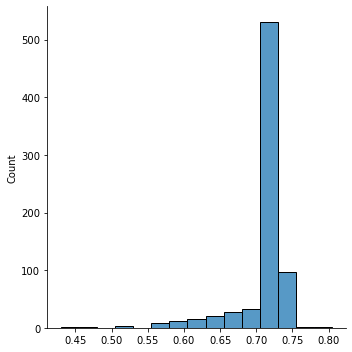

In [117]:
sns.displot(accs, binwidth=0.025)

In [103]:
np.mean(accs)

0.71370184

In [110]:
X_pred = model.predict(X_test)

In [112]:
X_pred.shape

(250, 228, 1)

In [114]:
Y_test.shape

(250, 228, 1)

In [118]:
m = tf.keras.metrics.BinaryAccuracy()
m.update_state(Y_test, X_pred)
m.result().numpy()

0.9678421

In [129]:
arr1 = np.array([
    [[0], [0], [1]],
    [[0], [1], [1]],
    [[1], [1], [1]]
])
arr2 = np.array([
    [[0.3], [0.7], [0.9]],
    [[0.1], [0.9], [0.2]],
    [[0.1], [0.4], [0.45]]
])

m = tf.keras.metrics.BinaryAccuracy()
m.update_state(arr1, arr2)
m.result().numpy()

0.44444445